In [0]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [0]:
# Sample: 1
# Sequence Length: 5
# feature dimension: 8

inputs = tf.random.normal([1, 5, 8])

# tf.keras.layers.LSTM

In [8]:
output = layers.LSTM(units=3)(inputs)
print(output.shape)
print(output)

(1, 3)
tf.Tensor([[ 0.12724768 -0.04300174 -0.01979046]], shape=(1, 3), dtype=float32)


In [12]:
# return_state=True => 依次丟三個東西(最後輸出, 最後的 Ht, 最後的 Ct)
# return_sequences=True => shape=(1, 3)->(1, 5, 3) => 可以收到每個時間點(5)的output(output, Ht, Ct)
whole_seq_output, final_hiden_state, final_cell_state = layers.LSTM(3, return_sequences=True, return_state=True)(inputs)
# 表示三個值
print('whole_seq_output: ', whole_seq_output.shape, whole_seq_output)
print('final_hiden_state (h): ', final_hiden_state.shape, final_hiden_state)
print('final_cell_state (c): ', final_cell_state.shape, final_cell_state)

whole_seq_output:  (1, 5, 3) tf.Tensor(
[[[ 0.07793313 -0.2527814  -0.09967431]
  [ 0.06017446 -0.348597   -0.03261752]
  [ 0.08651882 -0.13203485  0.05958357]
  [-0.00443149 -0.18762118  0.17473719]
  [-0.10880783 -0.34028378  0.11060169]]], shape=(1, 5, 3), dtype=float32)
final_hiden_state (h):  (1, 3) tf.Tensor([[-0.10880783 -0.34028378  0.11060169]], shape=(1, 3), dtype=float32)
final_cell_state (c):  (1, 3) tf.Tensor([[-0.11830861 -0.60872734  0.58039236]], shape=(1, 3), dtype=float32)


# tf.keras.layers.GRU

In [13]:
inputs = tf.random.normal([1, 5, 8])
output = layers.GRU(units=3)(inputs)
print(output.shape)

(1, 3)


In [14]:
# return_state=True => 依次丟兩個東西(最後輸出, 最後state)
whole_sequence_output, final_state = layers.GRU(3, return_sequences=True, return_state=True)(inputs)

print('whole_seq_output: ', whole_sequence_output.shape, whole_sequence_output)
print('final_state (h): ', final_state.shape, final_state)

whole_seq_output:  (1, 5, 3) tf.Tensor(
[[[-0.2264635   0.19418326 -0.37075573]
  [-0.19067843  0.260251    0.02770862]
  [-0.17494866 -0.18403187  0.09891024]
  [-0.06973509 -0.6149836  -0.52743536]
  [-0.5238515  -0.10428445 -0.01578496]]], shape=(1, 5, 3), dtype=float32)
final_state (h):  (1, 3) tf.Tensor([[-0.5238515  -0.10428445 -0.01578496]], shape=(1, 3), dtype=float32)


# tf.keras.layers.Bidirectional

In [19]:
inputs = tf.random.normal([1, 5, 8]) # 5個時間點, 每個時間點input向量長度
# layers.LSTM(3) -> 單邊output 長度為3的向量
# merge_mode : 雙向的output怎麼結合
output = layers.Bidirectional(layers.LSTM(10), merge_mode='concat')(inputs)
print(output.shape)

(1, 20)


In [20]:
# merge_mode: Sum
output = layers.Bidirectional(layers.LSTM(10), merge_mode='sum')(inputs)
print(output.shape)

(1, 10)


In [21]:
# return_sequences: True
output = layers.Bidirectional(layers.LSTM(10, return_sequences=True))(inputs)
print(output.shape)

(1, 5, 20)


In [25]:
# return_sequences: True, 
output, forward_h, forward_c, backward_h, backward_c = layers.Bidirectional(layers.LSTM(2, return_sequences=True, return_state=True))(inputs)
# output 前半為順向, 後半為逆向
print('output : ', output.shape, output)
print('forward_h : ', forward_h.shape, forward_h)
print('forward_c : ', forward_c.shape, forward_c)
print('backward_h : ', backward_h.shape, backward_h)
print('backward_c : ', backward_c.shape, backward_c)


output :  (1, 5, 4) tf.Tensor(
[[[-0.04834127  0.23915592  0.2976645   0.159952  ]
  [-0.16910931 -0.0572464   0.28414714  0.15160187]
  [-0.07751007  0.11895435  0.24655585  0.14862008]
  [-0.11200931  0.05113824  0.23575182 -0.02170975]
  [-0.06516302  0.4335445   0.04798404  0.03762117]]], shape=(1, 5, 4), dtype=float32)
forward_h :  (1, 2) tf.Tensor([[-0.06516302  0.4335445 ]], shape=(1, 2), dtype=float32)
forward_c :  (1, 2) tf.Tensor([[-0.2786094   0.57032853]], shape=(1, 2), dtype=float32)
backward_h :  (1, 2) tf.Tensor([[0.2976645 0.159952 ]], shape=(1, 2), dtype=float32)
backward_c :  (1, 2) tf.Tensor([[1.2255305 0.343796 ]], shape=(1, 2), dtype=float32)


## Many-to-one

In [26]:
input = layers.Input(shape=(5, 8))
x = layers.LSTM(10)(input)
ouput = layers.Dense(10)(x)
model = models.Model(input, ouput)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 5, 8)]            0         
_________________________________________________________________
lstm_21 (LSTM)               (None, 10)                760       
_________________________________________________________________
dense (Dense)                (None, 10)                110       
Total params: 870
Trainable params: 870
Non-trainable params: 0
_________________________________________________________________


In [27]:
# multi-layer, 多層 => 除了最後一層都要打開 return_sequences
input = layers.Input(shape=(5, 8))
x = layers.LSTM(10, return_sequences=True)(input)
x = layers.LSTM(10)(x)
ouput = layers.Dense(10)(x)
model = models.Model(input, ouput)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 5, 8)]            0         
_________________________________________________________________
lstm_22 (LSTM)               (None, 5, 10)             760       
_________________________________________________________________
lstm_23 (LSTM)               (None, 10)                840       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 1,710
Trainable params: 1,710
Non-trainable params: 0
_________________________________________________________________


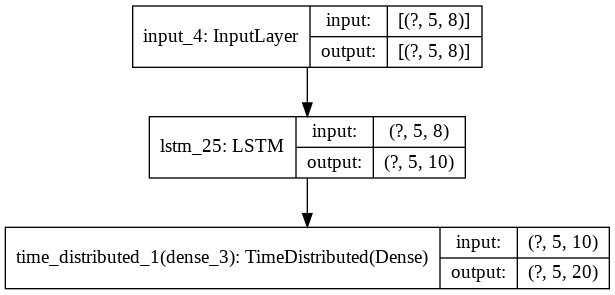

In [32]:
tf.keras.utils.plot_model(model, show_shapes=True)

# Many-to-many (same length)

In [29]:
input = layers.Input(shape=(5, 8))
x = layers.LSTM(10, return_sequences=True)(input)
ouput = layers.TimeDistributed(layers.Dense(20))(x)
model = models.Model(input, ouput)
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 5, 8)]            0         
_________________________________________________________________
lstm_25 (LSTM)               (None, 5, 10)             760       
_________________________________________________________________
time_distributed_1 (TimeDist (None, 5, 20)             220       
Total params: 980
Trainable params: 980
Non-trainable params: 0
_________________________________________________________________


## Many-to-many (different length) : Seq2seq